In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV, StratifiedKFold, RandomizedSearchCV

from sklearn.metrics import f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc, f1_score,roc_auc_score, make_scorer, precision_recall_curve
from sklearn.pipeline import Pipeline 

from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTENC
from imblearn.over_sampling import SMOTE

from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn import svm

import numpy as np
import matplotlib.pyplot as plt 

In [3]:
nic = pd.read_csv("NIC.csv",header=None)

In [4]:
nic.head()

,0
0,911232910V
1,937370580V
2,937784210V
3,940491240V
4,942251610V


In [5]:
nic.columns = ['ID']

In [6]:
nic.head()

,ID
0,911232910V
1,937370580V
2,937784210V
3,940491240V
4,942251610V


In [7]:
nic.shape

(5023, 1)

In [8]:
nic.isnull().sum()

ID    0
dtype: int64

In [9]:
nic['ID']=nic['ID'].astype(str)

In [10]:
nic.dtypes

ID    object
dtype: object

In [11]:
nic['Extracted_']=nic['ID'].str[:9]

In [12]:
nic['Birth_year']=nic['ID'].str.strip().str[0:2]

In [13]:
nic['Birthdayof_year']=nic['ID'].str.strip().str[2:5]

In [14]:
nic['Serial_number']=nic['ID'].str.strip().str[5:8]

In [15]:
nic['Check_digit'] = nic['ID'].str.strip().str[8]

In [16]:
nic['Special_ltr'] = nic['ID'].str.strip().str[9]

In [17]:
nic.head()

,ID,Extracted_,Birth_year,Birthdayof_year,Serial_number,Check_digit,Special_ltr
0,911232910V,911232910,91,123,291,0,V
1,937370580V,937370580,93,737,058,0,V
2,937784210V,937784210,93,778,421,0,V
3,940491240V,940491240,94,049,124,0,V
4,942251610V,942251610,94,225,161,0,V


In [18]:
nic.Check_digit.unique()

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [20]:
# nic.Extracted_1.isdigit()
# whether only numeric value is present in the column of dataframe in Python
nic['Extracted1_isdigit'] = list(map(lambda x: x.isdigit(), nic['Extracted_']))
print (nic)

# map(lambda x: x.isdigit(), nic['Extracted_1'])

              ID Extracted_ Birth_year Birthdayof_year Serial_number Check_digit  \
0     911232910V  911232910         91             123        291           0   
1     937370580V  937370580         93             737        058           0   
2     937784210V  937784210         93             778        421           0   
3     940491240V  940491240         94             049        124           0   
4     942251610V  942251610         94             225        161           0   
...          ...        ...        ...             ...        ...         ...   
5018  988190969V  988190969         98             819        096           9   
5019  988330809V  988330809         98             833        080           9   
5020  988501069V  988501069         98             850        106           9   
5021  995150549V  995150549         99             515        054           9   
5022  995291649V  995291649         99             529        164           9   

     Special_ltr  Extrac

In [21]:
nic.Extracted1_isdigit.value_counts()

True     5011
False      12
Name: Extracted1_isdigit, dtype: int64

In [22]:
nic[nic.Extracted1_isdigit.eq(False)]

,ID,Extracted_,Birth_year,Birthdayof_year,Serial_number,Check_digit,Special_ltr,Extracted1_isdigit
651,9776310S0V,9776310S0,97,763,10S,0,V,False
675,977904S60V,977904S60,97,790,4S6,0,V,False
1138,9757U1131V,9757U1131,97,57U,113,1,V,False
1283,97S331881V,97S331881,97,S33,188,1,V,False
1709,9778729S2V,9778729S2,97,787,29S,2,V,False
1740,9785S3672V,9785S3672,97,85S,367,2,V,False
1801,9872316U2V,9872316U2,98,723,16U,2,V,False
1887,961S53253V,961S53253,96,1S5,325,3,V,False
2194,97S572803V,97S572803,97,S57,280,3,V,False
2248,985S41353V,985S41353,98,5S4,135,3,V,False


In [23]:
nic['Extracted1_isdigit'].unique()

array([ True, False])

In [24]:
nic = nic[nic.Extracted1_isdigit != False]

In [25]:
nic.shape

(5011, 8)

In [26]:
nic.head()

,ID,Extracted_,Birth_year,Birthdayof_year,Serial_number,Check_digit,Special_ltr,Extracted1_isdigit
0,911232910V,911232910,91,123,291,0,V,True
1,937370580V,937370580,93,737,058,0,V,True
2,937784210V,937784210,93,778,421,0,V,True
3,940491240V,940491240,94,049,124,0,V,True
4,942251610V,942251610,94,225,161,0,V,True


In [29]:
nic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5011 entries, 0 to 5022
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  5011 non-null   object
 1   Extracted_          5011 non-null   object
 2   Birth_year          5011 non-null   object
 3   Birthdayof_year     5011 non-null   object
 4   Serial_number          5011 non-null   object
 5   Check_digit         5011 non-null   object
 6   Special_ltr         5011 non-null   object
 7   Extracted1_isdigit  5011 non-null   bool  
dtypes: bool(1), object(7)
memory usage: 318.1+ KB


In [30]:
duplicate = nic.duplicated()
print(duplicate.sum())

4


In [31]:
duplicate[duplicate]

952     True
1166    True
1849    True
3350    True
dtype: bool

In [32]:
nic[duplicate]

,ID,Extracted_,Birth_year,Birthdayof_year,Serial_number,Check_digit,Special_ltr,Extracted1_isdigit
952,947942301V,947942301,94,794,230,1,V,True
1166,976161831V,976161831,97,616,183,1,V,True
1849,951461423V,951461423,95,146,142,3,V,True
3350,968583646V,968583646,96,858,364,6,V,True


In [34]:
nic.drop_duplicates(keep='first', inplace =True)

In [35]:
duplicate = nic.duplicated()
print(duplicate.sum())

0


In [36]:
nic['Birth_year']=nic['Birth_year'].astype(int)
nic['Birthdayof_year']=nic['Birthdayof_year'].astype(int)
nic['Serial_number']=nic['Serial_number'].astype(int)
nic['Check_digit']=nic['Check_digit'].astype(int)

In [37]:
nic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5007 entries, 0 to 5022
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  5007 non-null   object
 1   Extracted_          5007 non-null   object
 2   Birth_year          5007 non-null   int32 
 3   Birthdayof_year     5007 non-null   int32 
 4   Serial_number          5007 non-null   int32 
 5   Check_digit         5007 non-null   int32 
 6   Special_ltr         5007 non-null   object
 7   Extracted1_isdigit  5007 non-null   bool  
dtypes: bool(1), int32(4), object(3)
memory usage: 239.6+ KB


In [40]:
X = nic.iloc[:,2:5]
y = nic.iloc[:,5]

In [41]:
X.head()

,Birth_year,Birthdayof_year,Serial_number
0,91,123,291
1,93,737,58
2,93,778,421
3,94,49,124
4,94,225,161


In [42]:
X.shape

(5007, 3)

In [43]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Check_digit, dtype: int32

In [303]:
#training data set to train the classification model as well as some test data to check the accuracy of the model build.
(X_train, X_test, y_train, y_test) = train_test_split(X,y, test_size=0.22, random_state=42)

In [304]:
X_train.shape

(3905, 3)

In [305]:
X_test.shape

(1102, 3)

In [306]:
y_train.shape

(3905,)

In [307]:
y_test.shape

(1102,)

In [ ]:
#Building the classifier
# DT = DecisionTreeClassifier(random_state=0)

In [ ]:
# DT

In [ ]:
#fit the classifer to the training set
# DT.fit(X_train,y_train)

#### model building

#### SVM

In [308]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')

In [309]:
svclassifier.fit(X_train, y_train)

SVC(kernel='linear')

In [310]:
y_hat_test=svclassifier.predict(X_test)
y_hat_test

array([0, 0, 0, ..., 0, 0, 0])

In [311]:
y_hat_train=svclassifier.predict(X_train)
y_hat_train

array([0, 0, 0, ..., 0, 0, 0])

In [312]:
train_f1 = f1_score(y_train, y_hat_train,average = 'macro')
test_f1 = f1_score(y_test, y_hat_test,average = 'macro')

print(f"Train f1 Score: {train_f1}")
print(f"Test f1 Score: {test_f1}")

Train f1 Score: 0.030952380952380953
Test f1 Score: 0.033785822021116144


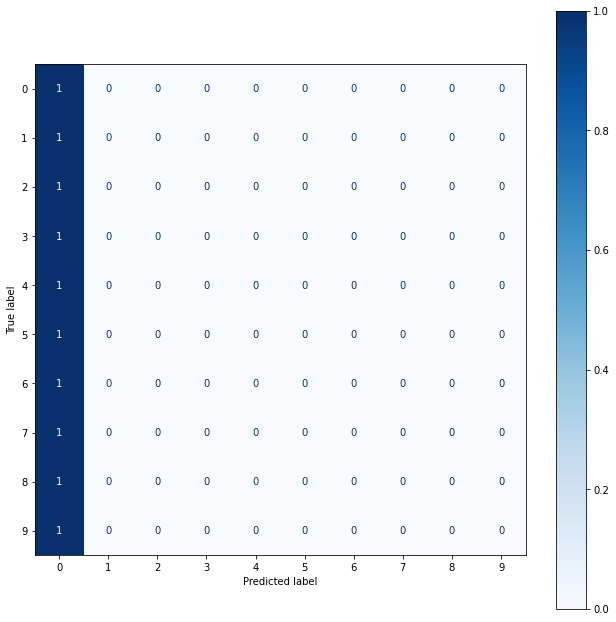

In [313]:
fig,ax = plt.subplots(figsize=(11,11))
plot_confusion_matrix(svclassifier, X_test, y_test, cmap='Blues', normalize='true',ax=ax);

In [314]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test,y_hat_test))
print(accuracy_score(y_test,y_hat_test))

              precision    recall  f1-score   support

           0       0.20      1.00      0.34       224
           1       0.00      0.00      0.00        97
           2       0.00      0.00      0.00       101
           3       0.00      0.00      0.00        91
           4       0.00      0.00      0.00        98
           5       0.00      0.00      0.00        80
           6       0.00      0.00      0.00        87
           7       0.00      0.00      0.00       119
           8       0.00      0.00      0.00       105
           9       0.00      0.00      0.00       100

    accuracy                           0.20      1102
   macro avg       0.02      0.10      0.03      1102
weighted avg       0.04      0.20      0.07      1102

0.20326678765880218


C:\Users\User\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [328]:
clf = svm.SVC(decision_function_shape='ovo')
clf.fit(X_train,y_train)

SVC(decision_function_shape='ovo')

In [330]:
y_hat_test=clf.predict(X_test)
y_hat_test

array([6, 3, 7, ..., 3, 6, 9])

In [331]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test,y_hat_test))
print(accuracy_score(y_test,y_hat_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       224
           1       0.06      0.07      0.06        97
           2       0.00      0.00      0.00       101
           3       0.09      0.14      0.11        91
           4       0.11      0.18      0.14        98
           5       0.07      0.10      0.08        80
           6       0.10      0.08      0.09        87
           7       0.12      0.20      0.15       119
           8       0.06      0.03      0.04       105
           9       0.10      0.22      0.14       100

    accuracy                           0.09      1102
   macro avg       0.07      0.10      0.08      1102
weighted avg       0.06      0.09      0.07      1102

0.0925589836660617


C:\Users\User\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [329]:
svm = LinearSVC(random_state=42)
# Make it an OvR classifier
ovr_classifier = OneVsRestClassifier(svm)

# Fit the data to the OvR classifier
ovr_classifier = ovr_classifier.fit(X_train, y_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", 

In [333]:
y_hat_test=ovr_classifier.predict(X_test)
y_hat_test

array([4, 4, 4, ..., 4, 4, 4])

In [334]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test,y_hat_test))
print(accuracy_score(y_test,y_hat_test))

              precision    recall  f1-score   support

           0       0.12      0.01      0.02       224
           1       0.00      0.00      0.00        97
           2       0.18      0.02      0.04       101
           3       0.00      0.00      0.00        91
           4       0.09      0.96      0.17        98
           5       0.00      0.00      0.00        80
           6       0.00      0.00      0.00        87
           7       0.00      0.00      0.00       119
           8       0.00      0.00      0.00       105
           9       0.18      0.05      0.08       100

    accuracy                           0.09      1102
   macro avg       0.06      0.10      0.03      1102
weighted avg       0.07      0.09      0.03      1102

0.09437386569872959


C:\Users\User\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Treating the imbalance dataset

In [315]:
#oversampling
rus = RandomOverSampler()
X_train,y_train = rus.fit_resample(X_train,y_train)

In [316]:
y_train.value_counts()

7    715
3    715
6    715
2    715
9    715
5    715
1    715
8    715
4    715
0    715
Name: Check_digit, dtype: int64

In [317]:
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(kernel='linear')

In [318]:
y_hat_test=svclassifier.predict(X_test)
y_hat_test

array([6, 6, 7, ..., 6, 6, 6])

In [319]:
y_hat_train=svclassifier.predict(X_train)
y_hat_train

array([6, 7, 2, ..., 2, 6, 7])

In [320]:
train_f1 = f1_score(y_train, y_hat_train,average = 'macro')
test_f1 = f1_score(y_test, y_hat_test,average = 'macro')

print(f"Train f1 Score: {train_f1}")
print(f"Test f1 Score: {test_f1}")

Train f1 Score: 0.0670768802307296
Test f1 Score: 0.058269043009603505


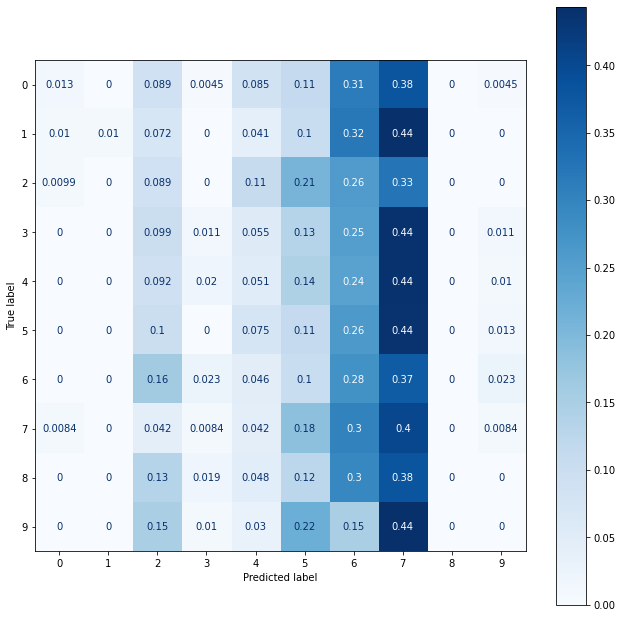

In [321]:
fig,ax = plt.subplots(figsize=(11,11))
plot_confusion_matrix(svclassifier, X_test, y_test, cmap='Blues', normalize='true',ax=ax);

In [322]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test,y_hat_test))
print(accuracy_score(y_test,y_hat_test))

              precision    recall  f1-score   support

           0       0.50      0.01      0.03       224
           1       1.00      0.01      0.02        97
           2       0.08      0.09      0.09       101
           3       0.10      0.01      0.02        91
           4       0.07      0.05      0.06        98
           5       0.06      0.11      0.08        80
           6       0.08      0.28      0.12        87
           7       0.11      0.40      0.17       119
           8       0.00      0.00      0.00       105
           9       0.00      0.00      0.00       100

    accuracy                           0.09      1102
   macro avg       0.20      0.10      0.06      1102
weighted avg       0.23      0.09      0.06      1102

0.09074410163339383


C:\Users\User\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### KNN

In [44]:
#training data set to train the classification model as well as some test data to check the accuracy of the model build.
(X_train_knn, X_test_knn, y_train_knn, y_test_knn) = train_test_split(X,y, test_size=0.22, random_state=42,stratify =y)

In [65]:
ks = np.arange(2, 20)
scores = []
for k in ks:
    model = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(model, X_train_knn, y_train_knn, cv=5)
    score.mean()
    scores.append(score.mean())


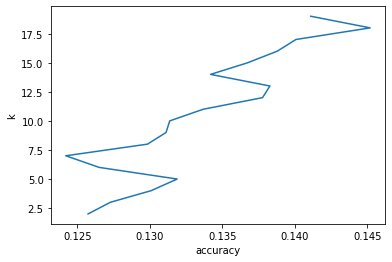

In [66]:
plt.plot(scores, ks)
plt.xlabel('accuracy')
plt.ylabel('k')
plt.show()

In [48]:
y_train_knn.value_counts()

0    732
6    374
3    370
7    365
8    360
1    354
4    342
5    337
9    336
2    335
Name: Check_digit, dtype: int64

In [49]:
model.fit(X_train_knn, y_train_knn)

KNeighborsClassifier(n_neighbors=9)

In [50]:
y_pred = model.predict(X_test_knn)
y_pred

array([0, 4, 6, ..., 6, 0, 9])

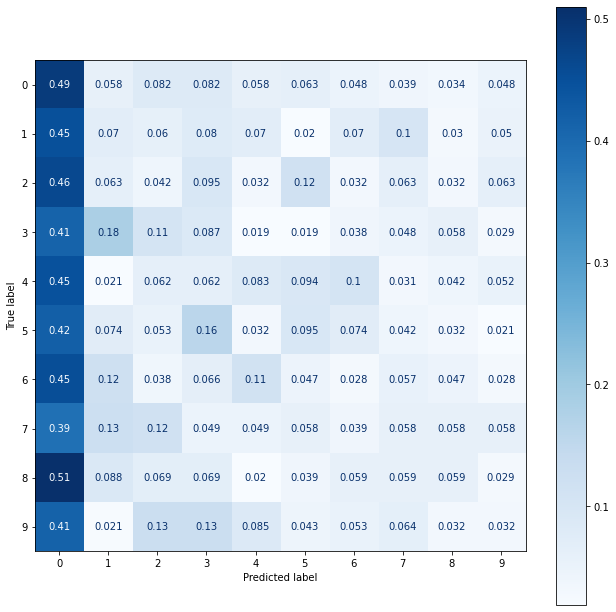

In [51]:
fig,ax = plt.subplots(figsize=(11,11))
plot_confusion_matrix(model, X_test_knn, y_test_knn, cmap='Blues', normalize='true',ax=ax);

In [52]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test_knn,y_pred))
print(accuracy_score(y_test_knn,y_pred))

              precision    recall  f1-score   support

           0       0.20      0.49      0.29       207
           1       0.08      0.07      0.07       100
           2       0.05      0.04      0.04        95
           3       0.09      0.09      0.09       104
           4       0.13      0.08      0.10        96
           5       0.14      0.09      0.11        95
           6       0.05      0.03      0.04       106
           7       0.10      0.06      0.07       103
           8       0.13      0.06      0.08       102
           9       0.07      0.03      0.04        94

    accuracy                           0.14      1102
   macro avg       0.10      0.10      0.09      1102
weighted avg       0.11      0.14      0.11      1102

0.14156079854809436


In [364]:
#oversampling
# rus = RandomOverSampler()
# X_train_knn,y_train_knn = rus.fit_resample(X_train_knn,y_train_knn)

In [365]:
# y_train_knn.value_counts()

7    715
3    715
6    715
2    715
9    715
5    715
1    715
8    715
4    715
0    715
Name: Check_digit, dtype: int64

In [383]:
model.fit(X_train_knn, y_train_knn)

KNeighborsClassifier(n_neighbors=9)

In [384]:
y_pred = model.predict(X_test_knn)
y_pred

array([0, 4, 6, ..., 6, 0, 9])

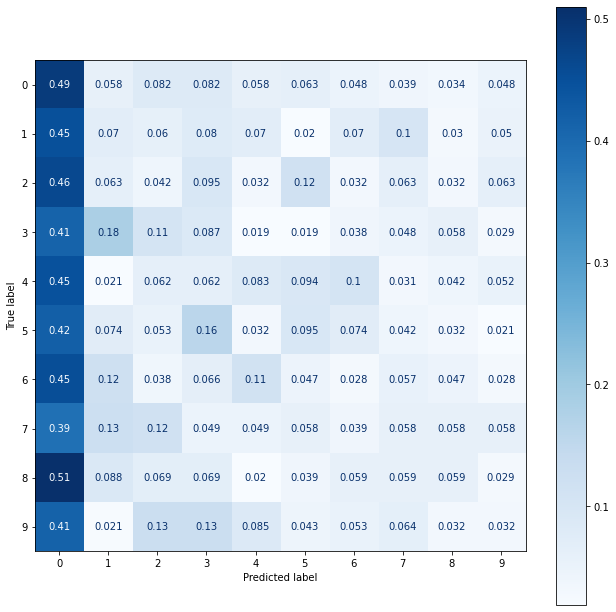

In [387]:
fig,ax = plt.subplots(figsize=(11,11))
plot_confusion_matrix(model, X_test_knn, y_test_knn, cmap='Blues', normalize='true',ax=ax);

In [388]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test_knn,y_pred))
print(accuracy_score(y_test_knn,y_pred))

              precision    recall  f1-score   support

           0       0.20      0.49      0.29       207
           1       0.08      0.07      0.07       100
           2       0.05      0.04      0.04        95
           3       0.09      0.09      0.09       104
           4       0.13      0.08      0.10        96
           5       0.14      0.09      0.11        95
           6       0.05      0.03      0.04       106
           7       0.10      0.06      0.07       103
           8       0.13      0.06      0.08       102
           9       0.07      0.03      0.04        94

    accuracy                           0.14      1102
   macro avg       0.10      0.10      0.09      1102
weighted avg       0.11      0.14      0.11      1102

0.14156079854809436


#### KNN hyper parameter tuning

In [ ]:
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,50))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(X_train_knn, y_train_knn)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

In [ ]:
y_pred_knn2 = best_model.predict(X_test_knn)
y_pred_knn2

In [ ]:
fig,ax = plt.subplots(figsize=(11,11))
plot_confusion_matrix(best_model, X_test, y_test, cmap='Blues', normalize='true',ax=ax);

In [ ]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test,y_pred_knn2))
print(accuracy_score(y_test,y_pred_knn2))

#### RF

In [247]:
from sklearn.ensemble import RandomForestClassifier
randomforest_classifier= RandomForestClassifier(n_estimators=150, criterion = 'entropy', random_state = 15,class_weight='balanced')

score=cross_val_score(randomforest_classifier,X_train,y_train,cv=10)

In [248]:
score.mean()

0.6630244600257897

In [249]:
randomforest_classifier.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=150, random_state=15)

In [250]:
pred_rf = randomforest_classifier.predict(X_test)

In [251]:
pred_rf

array([1, 9, 2, ..., 7, 5, 8])

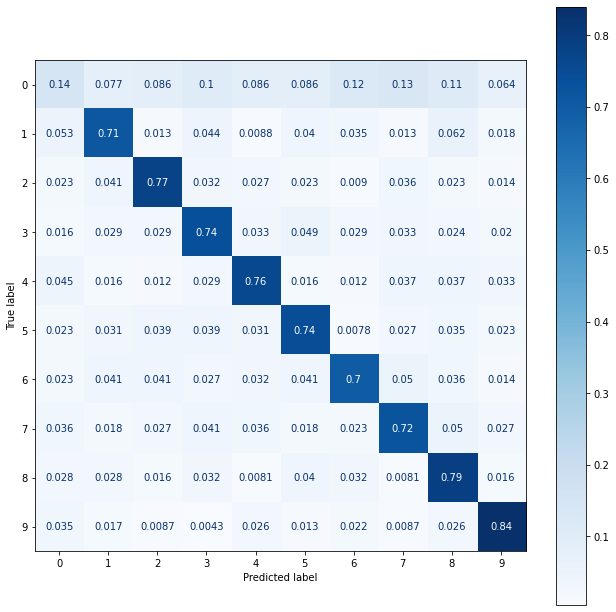

In [252]:
fig,ax = plt.subplots(figsize=(11,11))
plot_confusion_matrix(randomforest_classifier, X_test, y_test, cmap='Blues', normalize='true',ax=ax);

In [253]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test,pred_rf))
print(accuracy_score(y_test,pred_rf))

              precision    recall  f1-score   support

           0       0.33      0.14      0.20       233
           1       0.70      0.71      0.71       227
           2       0.73      0.77      0.75       222
           3       0.69      0.74      0.71       245
           4       0.73      0.76      0.75       243
           5       0.72      0.74      0.73       257
           6       0.70      0.70      0.70       222
           7       0.67      0.72      0.69       221
           8       0.68      0.79      0.73       247
           9       0.78      0.84      0.81       231

    accuracy                           0.69      2348
   macro avg       0.67      0.69      0.68      2348
weighted avg       0.67      0.69      0.68      2348

0.6933560477001703


#### XgBoost

In [254]:
seed =7
test_size=0.25
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=test_size, random_state = seed)

In [255]:
xg_model = XGBClassifier()
xg_model.fit(X_train,y_train)

C:\Users\User\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:01:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [256]:
pred_xg = xg_model.predict(X_test)

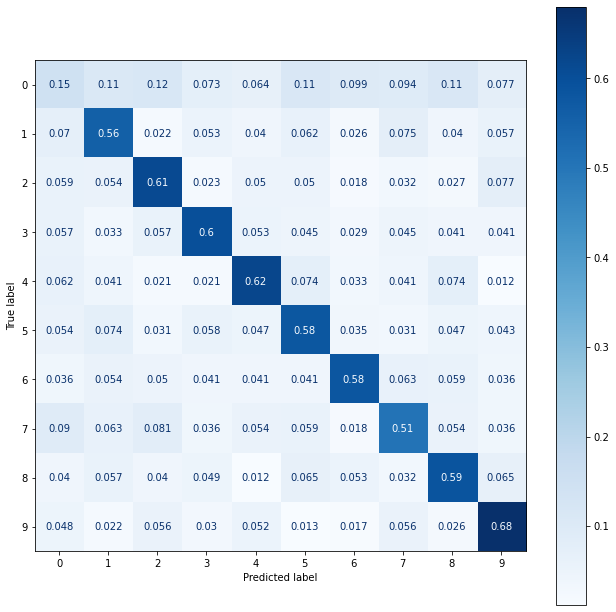

In [257]:
fig,ax = plt.subplots(figsize=(11,11))
plot_confusion_matrix(xg_model, X_test, y_test, cmap='Blues', normalize='true',ax=ax);

In [258]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test,pred_xg))
print(accuracy_score(y_test,pred_xg))

              precision    recall  f1-score   support

           0       0.22      0.15      0.18       233
           1       0.51      0.56      0.53       227
           2       0.55      0.61      0.58       222
           3       0.62      0.60      0.61       245
           4       0.61      0.62      0.62       243
           5       0.55      0.58      0.57       257
           6       0.62      0.58      0.60       222
           7       0.50      0.51      0.51       221
           8       0.56      0.59      0.58       247
           9       0.60      0.68      0.64       231

    accuracy                           0.55      2348
   macro avg       0.54      0.55      0.54      2348
weighted avg       0.54      0.55      0.54      2348

0.5477001703577513


#### Grid Search 

In [259]:
params = {'min_child_weight' : [1,5,10],
         'gamma' : [0.5,1,1.5,2,5],
         'subsample' : [0.6,0.8,1.0],
         'colsample_bytree' : [0.6,0.8,1.0],
         'max_depth' : [3,4,5]}

In [260]:
xgb = XGBClassifier(learning_rate = 0.02,n_estimators = 600, objective = 'multi:softprob', silent = True, nthread =1, 
                    scale_pos_weight= 85)

In [261]:
X_train.shape

(7042, 3)

In [262]:
y_train.shape

(7042,)

In [263]:
folds=5
param_comb =5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state =10)

random_search = RandomizedSearchCV(xgb, param_distributions = params, n_iter=param_comb, scoring = 'accuracy', n_jobs =-1, cv=skf,
                                  verbose =1, random_state=10)

random_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


C:\Users\User\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:04:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "scale_pos_weight", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:04:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=10, shuffle=True),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=0.02,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None,...
                                           random_state=None, reg_alpha=None,
                                           reg_lambda=None, scale_pos_weight=85,
                                           silent=True, subsample=None,
                                     

In [222]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=test_size, random_state = seed)

In [223]:
X_train.shape

(7042, 3)

In [224]:
y_train.shape

(7042,)

In [230]:
pred_grdXG= random_search.predict(X_test)

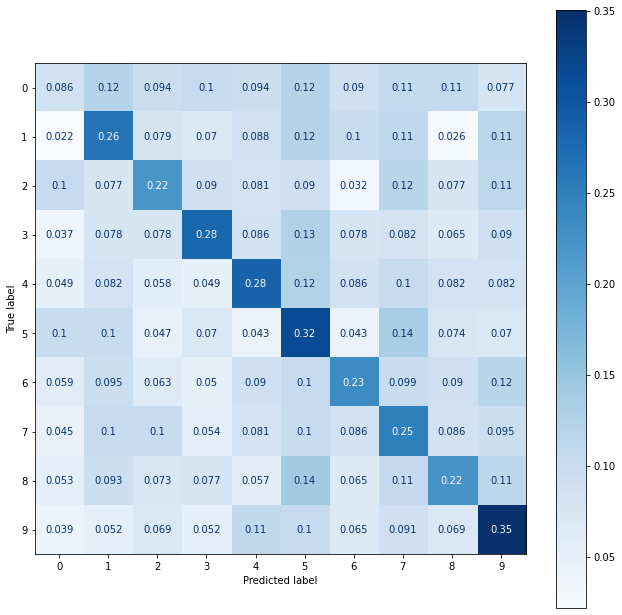

In [231]:
fig,ax = plt.subplots(figsize=(11,11))
plot_confusion_matrix(random_search, X_test, y_test, cmap='Blues', normalize='true',ax=ax);

In [232]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test,pred_grdXG))
print(accuracy_score(y_test,pred_grdXG))

              precision    recall  f1-score   support

           0       0.14      0.09      0.11       233
           1       0.24      0.26      0.25       227
           2       0.24      0.22      0.23       222
           3       0.32      0.28      0.30       245
           4       0.29      0.28      0.29       243
           5       0.25      0.32      0.28       257
           6       0.25      0.23      0.24       222
           7       0.20      0.25      0.22       221
           8       0.26      0.22      0.24       247
           9       0.28      0.35      0.31       231

    accuracy                           0.25      2348
   macro avg       0.25      0.25      0.25      2348
weighted avg       0.25      0.25      0.25      2348

0.25170357751277683


#### LR oneVSrest

In [119]:
(X_train_LR, X_test_LR, y_train_LR, y_test_LR) = train_test_split(X,y, test_size=0.22, random_state=42)

In [120]:
# Using pipeline for applying logistic regression and one vs rest classifier
LogReg_pipeline = Pipeline([('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=-1)),])


In [121]:
# Training logistic regression model on train data
LogReg_pipeline.fit(X_train, y_train)

Pipeline(steps=[('clf',
                 OneVsRestClassifier(estimator=LogisticRegression(solver='sag'),
                                     n_jobs=-1))])

In [122]:
# calculating test accuracy
prediction = LogReg_pipeline.predict(X_test)
print('Test accuracy is {}'.format(accuracy_score(y_test, prediction)))
print("\n")

Test accuracy is 0.0824524312896406




In [123]:
# using binary relevance
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB
# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier
classifier = BinaryRelevance(GaussianNB())
# train
classifier.fit(X_train, y_train)
# predict
predictions = classifier.predict(X_test)
# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))

AttributeError: 'Series' object has no attribute 'reshape'

#### Prediction for unseen data

In [ ]:
prediction_tsk1 = pd.read_csv('Pred_task1.csv')

In [ ]:
prediction_tsk1.head()

In [ ]:
prediction_tsk1['ID']=prediction_tsk1['ID'].astype(str)
prediction_tsk1['Birth_year']=prediction_tsk1['ID'].str.strip().str[0:2]
prediction_tsk1['Birthdayof_year']=prediction_tsk1['ID'].str.strip().str[2:5]
prediction_tsk1['Serial_number']=prediction_tsk1['ID'].str.strip().str[5:8]

In [ ]:
prediction_tsk1

In [ ]:
prediction_tsk1['Extracted1_isdigit'] = list(map(lambda x: x.isdigit(), prediction_tsk1['ID']))
prediction_tsk1

In [ ]:
prediction_tsk1 = prediction_tsk1[prediction_tsk1.Extracted1_isdigit != False]

In [ ]:
prediction_tsk1

In [ ]:
!pip install scikit-multilearn

In [ ]:
duplicate = prediction_tsk1.duplicated()
print(duplicate.sum())

In [ ]:
prediction_tsk1['Birth_year']=prediction_tsk1['Birth_year'].astype(int)
prediction_tsk1['Birthdayof_year']=prediction_tsk1['Birthdayof_year'].astype(int)
prediction_tsk1['Serial_number']=prediction_tsk1['Serial_number'].astype(int)

In [ ]:
prediction_tsk1.columns

In [ ]:
X_pred= prediction_tsk1[['Birth_year', 'Birthdayof_year', 'Serial_number']]

In [ ]:
pred_test_svm = svclassifier.predict(X_pred)

In [ ]:
pred_test_svm